In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

### Задание 1

Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

### Нормальное распределение

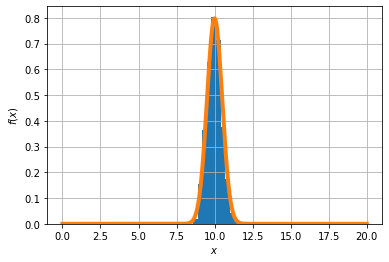

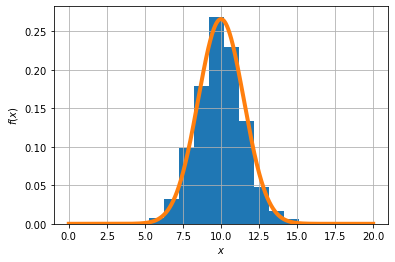

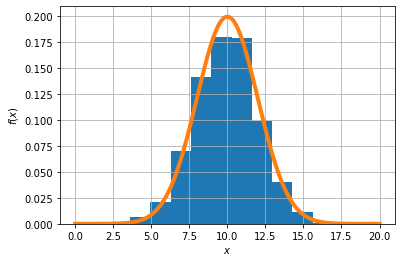

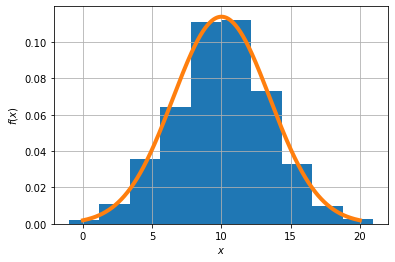

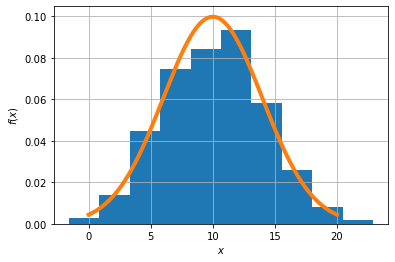

In [2]:
def get_gaussian_distribution_density(mu_sigma_list):
    for _ in mu_sigma_list:
        # distribution
        norm_rv = sts.norm(loc=_[0], scale=_[1])
        pd.DataFrame(norm_rv.rvs(size=1000)).hist(bins=10, lw=5, density=True)
        plt.title('')
        plt.ylabel('$Frequency$')
        plt.xlabel('$x$')
        # density
        x = np.linspace(0, 20, 1000)
        plt.plot(x, norm_rv.pdf(x), lw=4)
        plt.ylabel('$f(x)$')
        plt.xlabel('$x$')
    plt.show()

get_gaussian_distribution_density([
    [10.0, 0.50],
    [10.0, 1.50],
    [10.00, 2.00],
    [10.00, 3.50],
    [10.00, 4.00],
])

### Экспоненциальное распредление

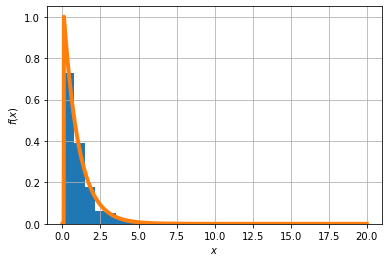

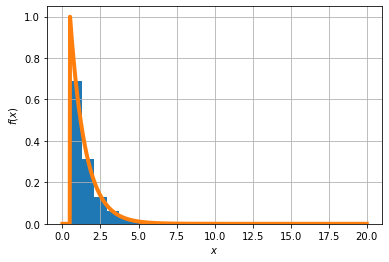

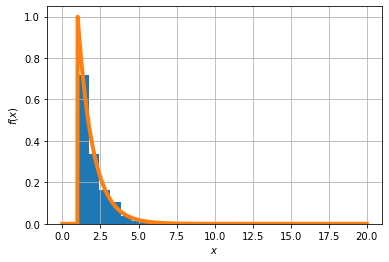

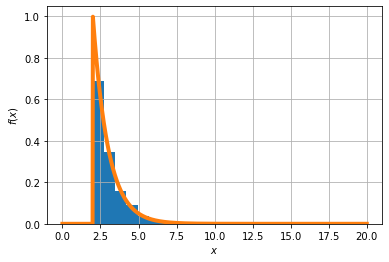

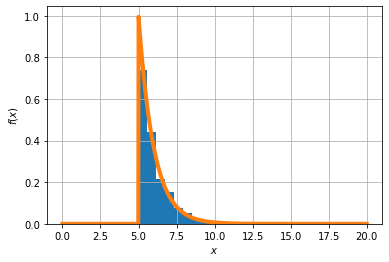

In [3]:
def get_exponential_distribution_density(lambda_list):
    for _ in lambda_list:
        # distribution        
        expon_rv = sts.expon(_)
        pd.DataFrame(expon_rv.rvs(size=1000)).hist(bins=10, lw=5, density=True)
        plt.title('')
        plt.ylabel('$Frequency$')
        plt.xlabel('$x$')
        # density
        x = np.linspace(0, 20, 1000)
        plt.plot(x, expon_rv.pdf(x), lw=4)
        plt.ylabel('$f(x)$')
        plt.xlabel('$x$')
    plt.show()

get_exponential_distribution_density([
    0.1,
    0.5,
    1.0,
    2.0,
    5.0,
])

### Распределение Стьюдента

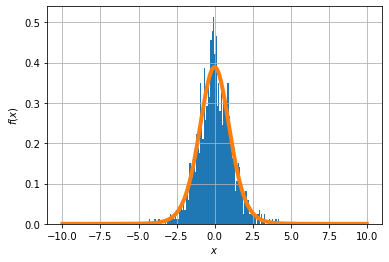

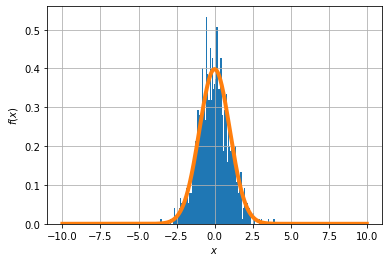

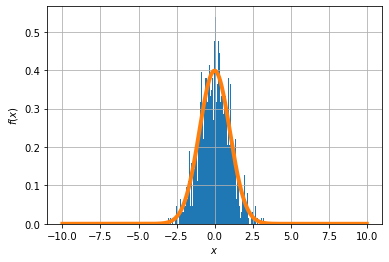

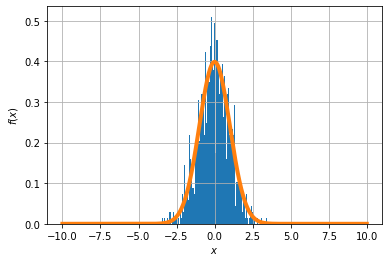

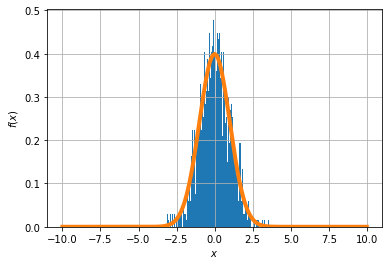

In [4]:
def get_student_distribution_density(n_list):
    for _ in n_list:
        # distribution        
        t_rv = sts.t(_)
        pd.DataFrame(t_rv.rvs(size=1000)).hist(bins=100, lw=5, density=True)
        plt.title('')
        plt.ylabel('$Frequency$')
        plt.xlabel('$x$')
        # density
        x = np.linspace(-10, 10, 1000)
        plt.plot(x, t_rv.pdf(x), lw=4)
        plt.ylabel('$f(x)$')
        plt.xlabel('$x$')
    plt.show()

get_student_distribution_density([
    10.0,
    200.0,
    300.0,
    400.0,
    500.0,
])

### Задание 2

Непрерывная случайная величина задана плотностью распределения:
$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$
Найдите C, математическое ожидание $\xi$ а также вероятность попадания $\xi$ в отрезок $[3.5;7]$, т.е. $P(3.5<\xi<7)$.

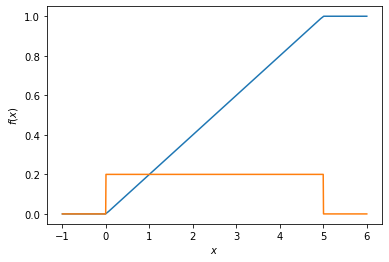

Параметр С = 0.2, математическое ожидание  𝜉 = 2.5,  а также вероятность попадания  𝜉  в отрезок  [3.5;7] равна 0.3


In [5]:
A = 0
B = 5
P_MIN = 3.5
P_MAX = 7

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(A, B-A)
uniform_rv.rvs(10)

x = np.linspace(-1,6,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

x = np.linspace(-1,6,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

# Параметр С
C = 1 / 5
# Математическое ожидание
M = (B - A) / 2
# Вероятность попадания в интервал
# F = 1/5 * X
P = round((5 - 3.5) / (5 - 0), 2)
print(f'Параметр С = {C}, математическое ожидание  𝜉 = {M},  а также вероятность попадания  𝜉  в отрезок  [3.5;7] равна {P}')

### Задание 3
Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [6]:
# Так как равновероятно, что всегда загорятся 3 цвтеа светофора, то в случае 28, 28 и 28 секунд результат будет тот же.

N = 3 # Количетсов вариантов цветов

# Шеннон
p = 1 / 3
I = np.log2(1 / p)
print(round(I, 2))

# Хартли
I = np.log2(N)
print(round(I, 2))

1.58
1.58
